# Computer Vision

CV is a field of deep learning that enables machines to see, identify and process images like humans.

Each pixel in an image has a color which has been produced by some combination of the primary colors red, green, and blue (RGB). Each of these colors can have a brightness value ranging from 0 to 255 for a digital image with a bit depth of 8-bits.

# Image Processing using Open CV

- Open CV is an open source computer vision library. It involves analysing images to produce useful information.
- **Open CV reads a given image in a BGR format by default**

## Image Augmentation Techniques

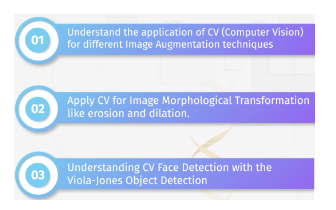

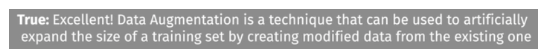

## Topics- Image preprocessing

1. Read and Display an image
2. Changing Color Spaces
3. Image Resizing
4. Image Scaling
5. Image Rotation
6. Image Translation
7. Edge Detection
8. Image Smoothing
9. Image Thresholding
10. Contour Detection



# <font color=blue>1.Read and Display an image

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

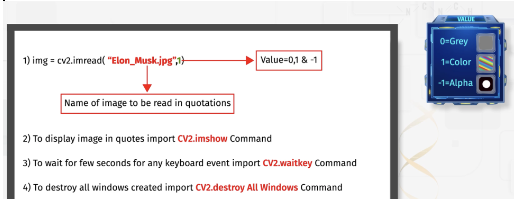

In [2]:
# Read an image

os.chdir(r"/Users/sylvia/Desktop/datasets/CV")
img = cv2.imread('Elon_Musk.jpeg', 1)


In [3]:
# Show image
# cv2.imshow('Elon Musk',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [4]:
img.shape


(258, 195, 3)

In [5]:
img.shape[0]   # height


258

In [6]:
img.shape[1]   # width


195

## When u read a file using cv2, file is stored in BGR.

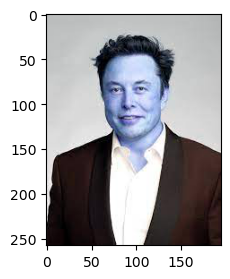

In [7]:
# Show image
plt.figure(figsize=(3,3))

plt.imshow(img);


## To show actual image which is RGB format, 2 options 
1. Use cv2.split and then cv2.merge into r,g,b
2. Use cv2.cvtColor to change BGR to RGB.

**Option1 - using cv2.split and cv2.merge**

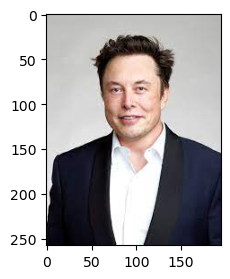

In [8]:
# To show actual image 
# Option1 

b,g,r = cv2.split(img)
img1 = cv2.merge((r,g,b))
plt.figure(figsize=(3,3))

plt.imshow(img1);

**Option2 - cv2.cvtColor**

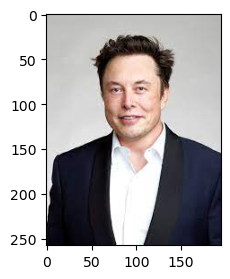

In [9]:
# To show actual image 
# Option2

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))

plt.imshow(img2);


# <font color=blue>2.Changing Color Spaces

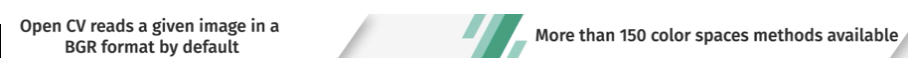

Here we demonstate 2 methods, converting image to-
1. greyscale and 
2. hsv color space

**Note - For greyscale we always need to use cmap=gray**

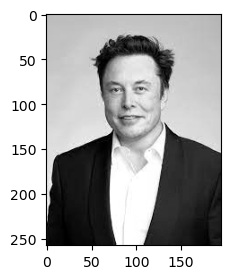

In [10]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(3,3))

plt.imshow(grey_img, cmap = 'gray');

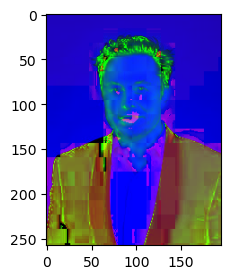

In [11]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(3,3))

plt.imshow(hsv_img);

### Schemes (RGB, CMYK, HSV) that describe the way colors combine to create the spectrum we see.

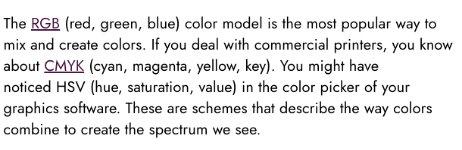

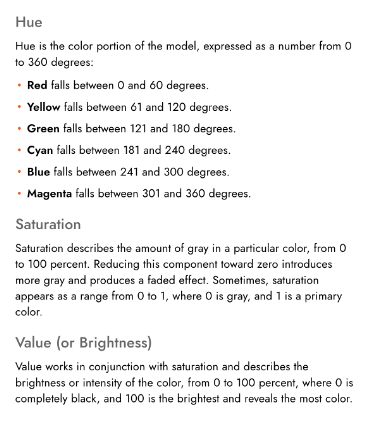

# <font color=blue>3.Image Resizing

When an image is resized, its pixel information is changed

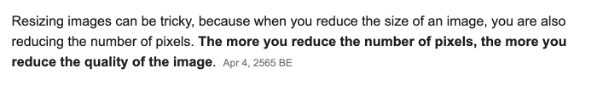


Image interpolation occurs when you resize or distort your image from one pixel grid to another. Image **resizing** is necessary when you need to increase or decrease the total number of pixels, whereas **remapping** can occur when you are correcting for lens distortion or rotating an image.

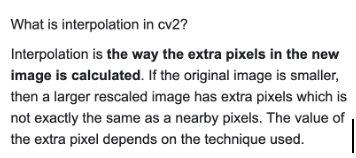

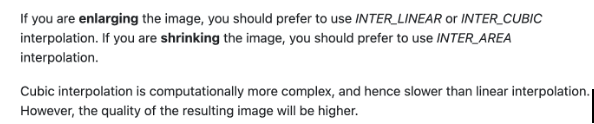

In [12]:
#cv2.INTER_AREA - zooms or shrink the image ?
#cv2.INTER_LINEAR - shrinks or zoom the image ?

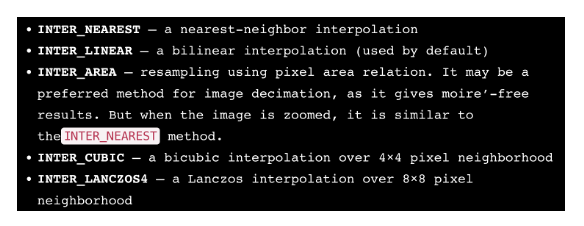

In [13]:
# Creating a function to resize the given input image

def resize(img, width, height,ip):
    dim = (width, height)
    resize_img = cv2.resize(img, dim, interpolation=ip)
    return resize_img

original image: (258, 195, 3)
resized image: (100, 100, 3)


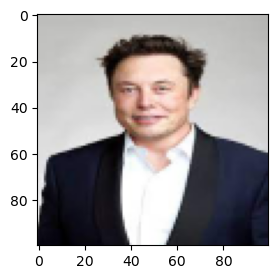

In [14]:
# Call function

# Image is smaller in size than original but zoomed cz of cv2.INTER_AREA

resize_img = resize(img1, 100,100,cv2.INTER_AREA)

print('original image:', img1.shape)
print('resized image:', resize_img.shape)

plt.figure(figsize=(3,3))

plt.imshow(resize_img);

In [15]:
resize_img1 = resize(img1, 400,400, cv2.INTER_LINEAR)

# Image bigger in size than original & still zoomed??

print('original image:', img1.shape)
print('resized image:', resize_img1.shape)



original image: (258, 195, 3)
resized image: (400, 400, 3)


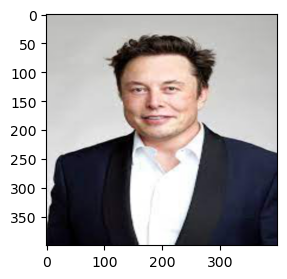

In [16]:
plt.figure(figsize=(3,3))

plt.imshow(resize_img1);

# <font color=blue> 4.Image Scaling
    
## <font color=blue> Upscale and Downscale the image (in terms of %)

In [17]:
# Define function

def resize_scaling(img, percentage,ip):
    height = int(img.shape[0] * percentage/100)
    width = int(img.shape[1] * percentage/100)
    dim = (width,height)
    new_img = cv2.resize(img, dim, interpolation=ip)
    return new_img
    

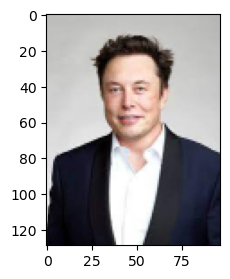

In [18]:
# Call function

rescaled_img = resize_scaling(img1,50,cv2.INTER_AREA)
plt.figure(figsize=(3,3))

plt.imshow(rescaled_img);

In [19]:
print('original image:', img1.shape)
print('resized image:', rescaled_img.shape)

original image: (258, 195, 3)
resized image: (129, 97, 3)


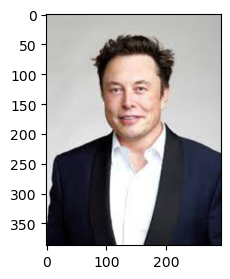

In [20]:
# Call function

rescaled_img1 = resize_scaling(img1,150,cv2.INTER_LINEAR)
plt.figure(figsize=(3,3))

plt.imshow(rescaled_img1);

In [21]:
print('original image:', img1.shape)
print('resized image:', rescaled_img1.shape)

original image: (258, 195, 3)
resized image: (387, 292, 3)


# <font color=blue>5.Image Rotation

We need a lot of data to train any deep learning model. Data Augmentation can be used to increase sample size.

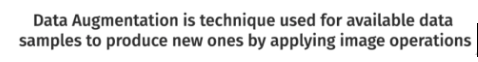

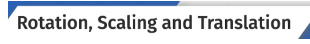

This makes model more robust to changes in input & leads to better generalization.

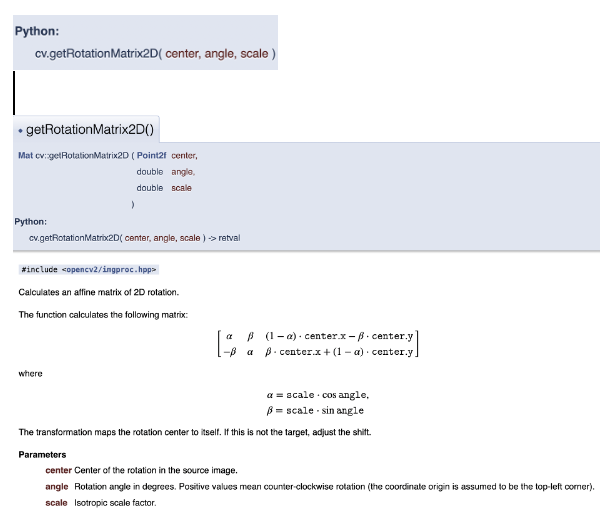

#### Clockwise



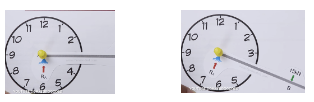

#### Anti-Clockwise



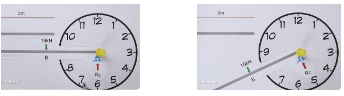

In [22]:
# Positive values of angle indicate anti-clockwise direction.
# Negative values of angle indicate clockwise direction. 

 ### **Affine Transformation is basically a relation between two images**

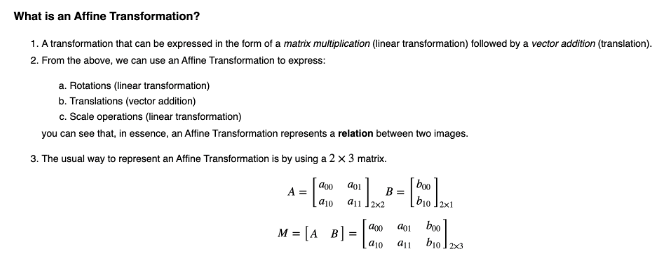

In [23]:
old_img = img1

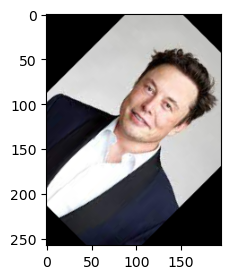

In [24]:
rows, cols = img1.shape[0:2]    # rows=258, cols=195
new_img = cv2.getRotationMatrix2D((cols/2,rows/2), -45, 1)   # clockwise rotation

# warpAffine function applies a Rotation to the image after being transformed. 
img_rotate = cv2.warpAffine(old_img, new_img, (cols,rows))

plt.figure(figsize=(3,3))

plt.imshow(img_rotate);

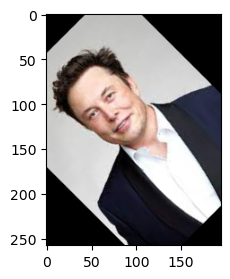

In [25]:
rows, cols = img1.shape[0:2]    # rows=258, cols=195       # height, width
new_img1 = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)    # anti-clockwise rotation

img_rotate1 = cv2.warpAffine(old_img, new_img1, (cols,rows))           # width, height

plt.figure(figsize=(3,3))

plt.imshow(img_rotate1);

# <font color=blue>6.Image Translation

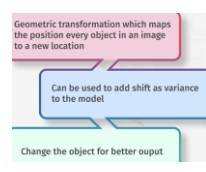

By translation we can change position of object in image giving more variety to model that leads to better generalizability which works in different conditions.

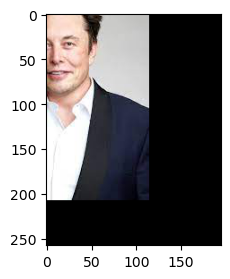

In [26]:
n_img = np.float32([[1,0,-80],    # 80 pixels from x-axis
                   [0,1,-50]])    # 50 pixels from y-axis

img_translate = cv2.warpAffine(old_img, n_img,(cols,rows))

plt.figure(figsize=(3,3))

plt.imshow(img_translate);

In [27]:
old_img.shape

(258, 195, 3)

# <font color=blue>7.Edge Detection

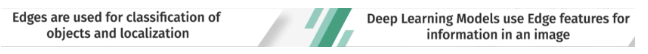

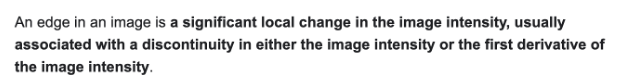

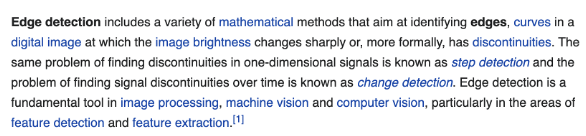

https://en.wikipedia.org/wiki/Edge_detection

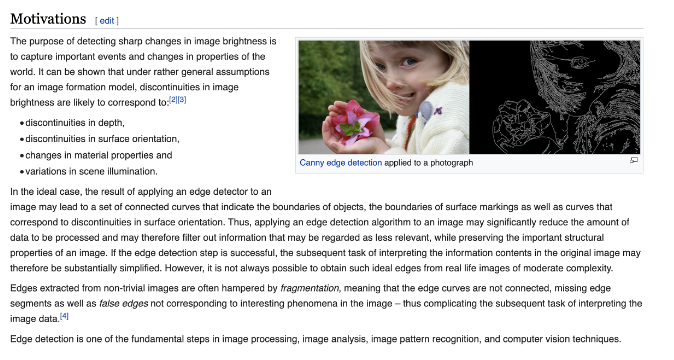

### Edge detection and corner detection algorithms

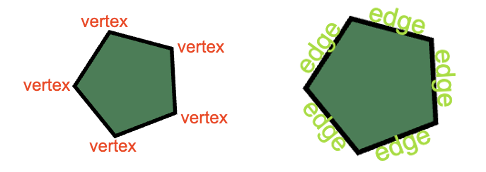

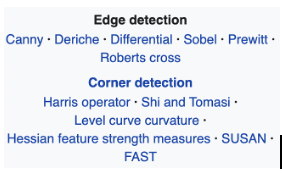

### <font color=blue>Canny Algorithm to detect edges

#### Assumptions in Canny
Convert to grayscale and normalize pixel intensity between 0 to 255.

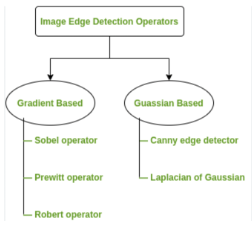

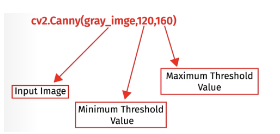

How to decide threshold values in Canny? - I think this should be taken case by case, based on images you r having.

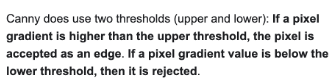

- To decide which are all edges, are really edges, and which are not. For this, we need two threshold values, minVal and maxVal. 
- At lower thresholds the Canny edge detector obtains too many edges, many of which may be weak and noisy.
- So what about the pixels inbetween upper and lower threshold? They are considered only if they are connected to pixels in upper threshold. Thus we get a clean edge map.

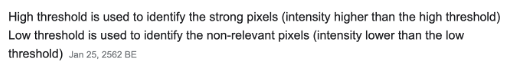

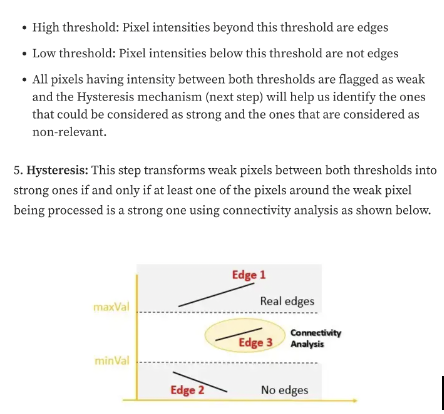

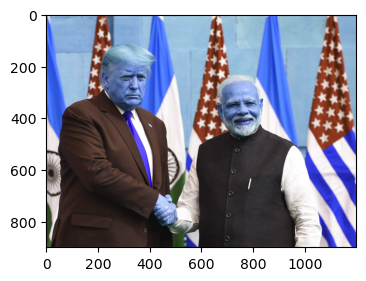

In [28]:
os.chdir(r"/Users/sylvia/Desktop/datasets/CV")
image = cv2.imread('trump_modi.jpeg', 1)
plt.figure(figsize=(4,4))

plt.imshow(image);

In [29]:
# Actual image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(900, 1200, 3)

(450, 600, 3)

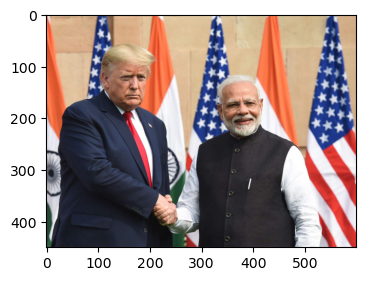

In [30]:
rescaled_image = resize_scaling(image,50,cv2.INTER_AREA)
plt.figure(figsize=(4,4))

plt.imshow(rescaled_image);
rescaled_image.shape

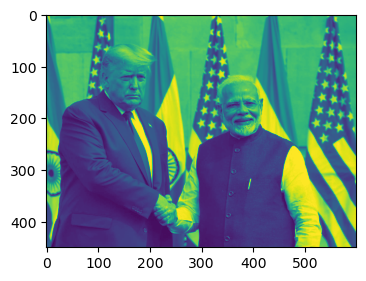

In [31]:
# For Canny algorithm, image needs to be in greyscale

grey_img1 = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(4,4))

plt.imshow(grey_img1);


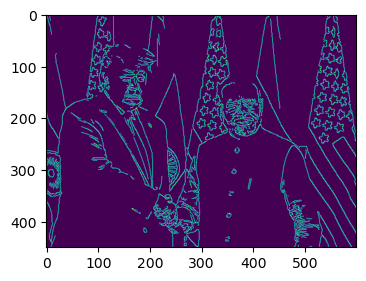

In [32]:
img_edges = cv2.Canny(grey_img1,120,160)
plt.figure(figsize=(4,4))

plt.imshow(img_edges);

# <font color=blue>8.Image Smoothing

The magnitude of noise is usually described based on a statistical measure called the "standard deviation," which quantifies the typical variation a pixel will have from its "true" value.

**Noise in Images**

- Some degree of noise is always present in any electronic device that transmits or receives a "signal." For televisions this signal is the broadcast data transmitted over cable or received at the antenna; for digital cameras, the signal is the light which hits the camera sensor.
- Even though noise is unavoidable, it can become so small relative to the signal that it appears to be nonexistent. The signal to noise ratio (SNR) is a useful and universal way of comparing the relative amounts of signal and noise for any electronic system; high ratios will have very little visible noise whereas the opposite is true for low ratios.

**Frequency in Images**

- Frequency is the rate at which something occurs.
- In images, rate of change or variation of pixel values from its true value.

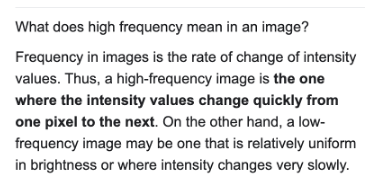

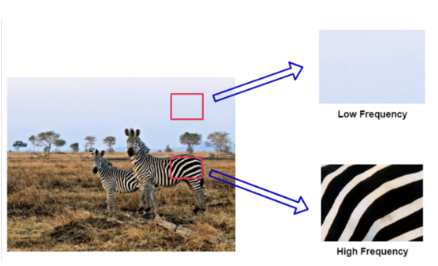

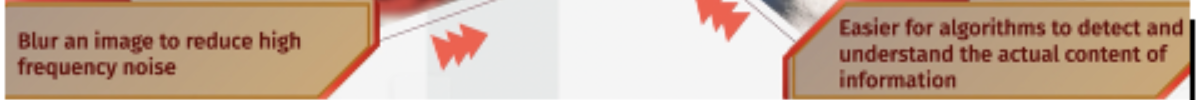

(320, 596, 3)

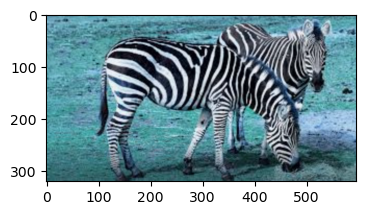

In [33]:
img3 = cv2.imread('zebra.jpg', 1)
plt.figure(figsize=(4,4))

plt.imshow(img3);
img3.shape

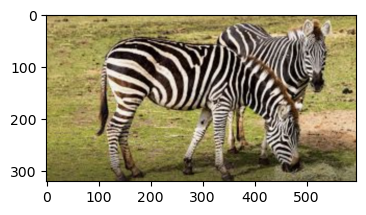

In [34]:
# Actual image
img4 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))

plt.imshow(img4);


- Larger kernels will yield more blurry images while smaller kernels will yield less blurry images.
- We use Guassian and median blur.

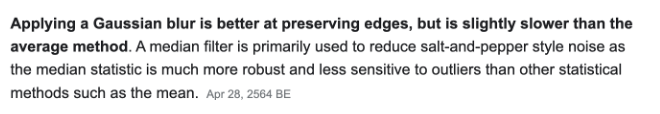

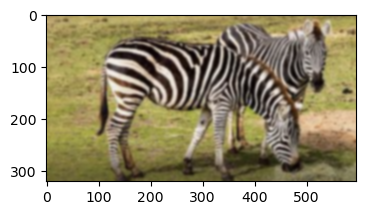

In [35]:
# Using guassian blur for an image
# Kernel size should be odd number only

blur_img = cv2.GaussianBlur(img4, (11,11),0)  # large kernel size more blurred
plt.figure(figsize=(4,4))

plt.imshow(blur_img);

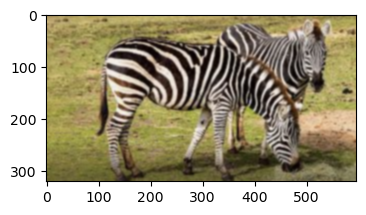

In [36]:
blur_img1 = cv2.GaussianBlur(img4, (7,7),0)   # small kernel size less blurred
plt.figure(figsize=(4,4))

plt.imshow(blur_img1);

We use Median blur now-

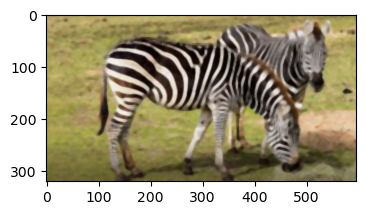

In [37]:
mblur_img = cv2.medianBlur(img4, 7)    # 7 is kernel size

plt.figure(figsize=(4,4))

plt.imshow(mblur_img);

# <font color=blue>9.Image Thresholding

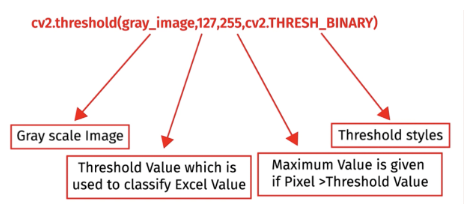

#### Simple Thresholding / Basic threholding / cv.THRESH_BINARY

- For every pixel, the same threshold value is applied. **If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.**
- The function cv.threshold is used to apply the thresholding.
- The *first argument is the source image*, which should be a grayscale image.
- The *second argument is the threshold value* which is used to classify the pixel values.
- The *third argument is the maximum value* which is assigned to pixel values exceeding the threshold.
- OpenCV provides different *types of thresholding which is given by the fourth parameter* of the function.

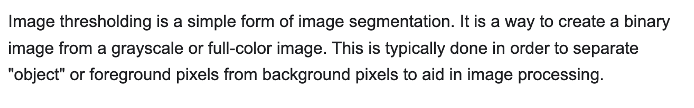

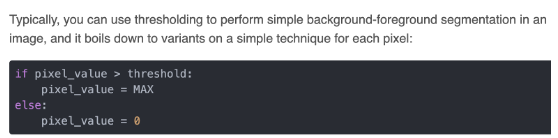

#### Thresholding Types

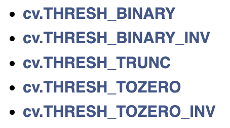

In [38]:
img = cv2.imread('/Users/sylvia/Desktop/datasets/CV/gradient.jpg', 1)


In [39]:
img

array([[[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

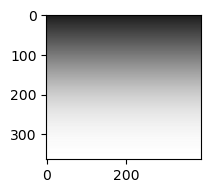

In [40]:
plt.figure(figsize=(2,2))

plt.imshow(img);

In [41]:
thres_val, thres_img1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [42]:
print(thres_val)
print(thres_img1)   # We notice the image is now made up of just 0 and 255
                    # If pixel value > 127 then white else 0 which is black
    # From original image (23,23,23) etc r all convereted to 0 since <127
    # Hence in below threholdeed image, the upper portion of image appears black.

127.0
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


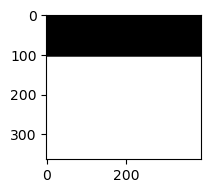

In [43]:
plt.figure(figsize=(2,2))
plt.imshow(thres_img1);

In [44]:
thres_val2, thres_img2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
thres_val3, thres_img3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
thres_val4, thres_img4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
thres_val5, thres_img5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

In [45]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thres_img1, thres_img2, thres_img3, thres_img4, thres_img5]

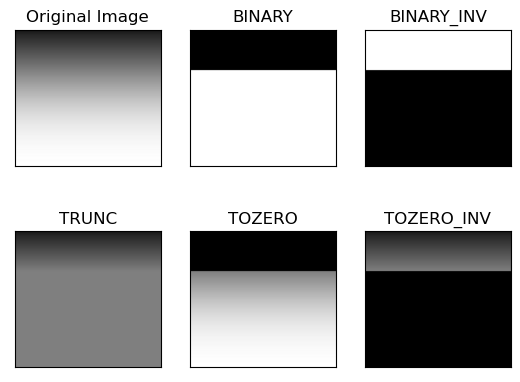

In [46]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

- THRESH_BINARY and THRESH_BINARY_INV are inverse of each other, and binarize an image between 0 and 255, assigning them to the background and foreground respectively, and vice versa.
- THRESH_TRUNC binarizes the image between threshold and 255.
- THRESH_TOZERO and THRESH_TOZERO_INV binarize between 0 and the current pixel value.


In [47]:
imgg = cv2.imread('/Users/sylvia/Desktop/datasets/CV/m_gandhi.jpeg')

grey_imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)


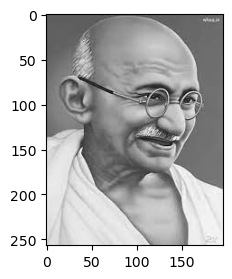

In [48]:
plt.figure(figsize=(3,3))

plt.imshow(grey_imgg,cmap="gray");

In [49]:
thres_val1, thres_img1 = cv2.threshold(grey_imgg,127,255,cv2.THRESH_BINARY)
thres_val2, thres_img2 = cv2.threshold(grey_imgg,127,255,cv2.THRESH_BINARY_INV)
thres_val3, thres_img3 = cv2.threshold(grey_imgg,127,255,cv2.THRESH_TRUNC)
thres_val4, thres_img4 = cv2.threshold(grey_imgg,127,255,cv2.THRESH_TOZERO)
thres_val5, thres_img5 = cv2.threshold(grey_imgg,127,255,cv2.THRESH_TOZERO_INV)

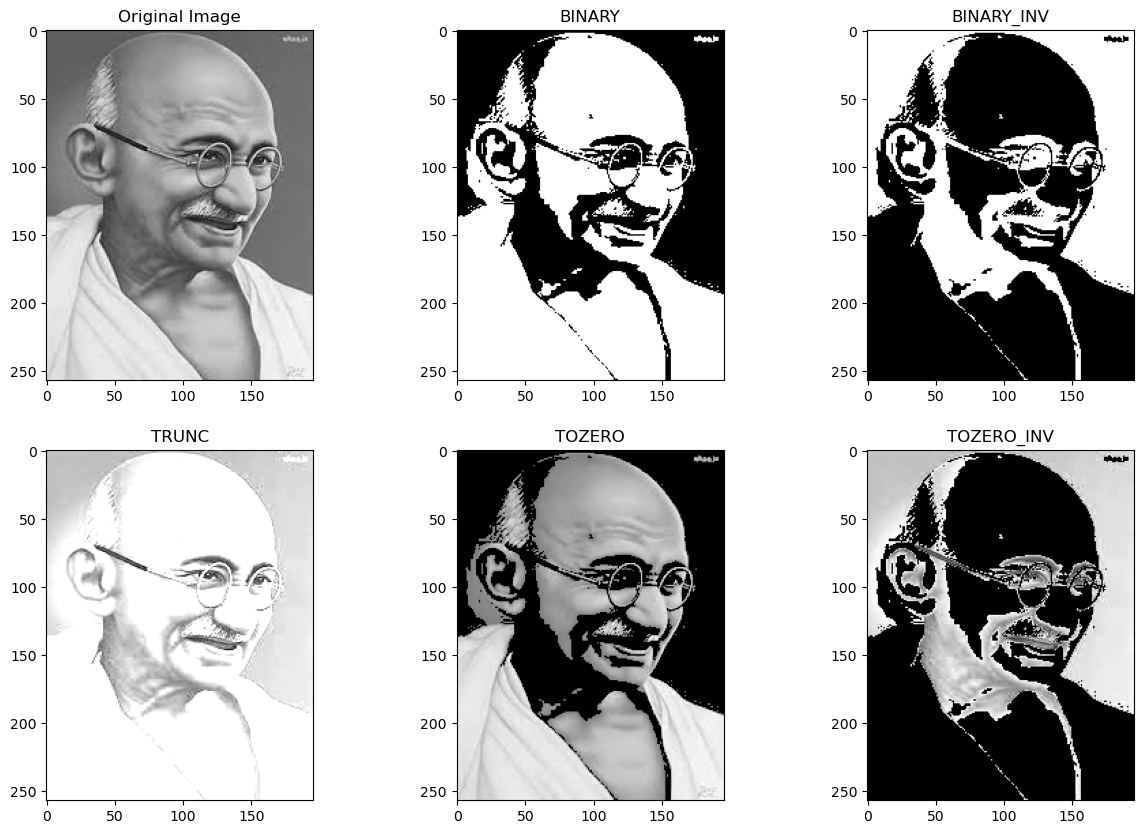

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(grey_imgg,cmap="gray")
plt.title('Original Image')

plt.subplot(232)
plt.imshow(thres_img1,cmap="gray")
plt.title('BINARY')

plt.subplot(233)
plt.imshow(thres_img2,cmap="gray")
plt.title('BINARY_INV')

plt.subplot(234)
plt.imshow(thres_img3,cmap="gray")
plt.title('TRUNC')

plt.subplot(235)
plt.imshow(thres_img4,cmap="gray")
plt.title('TOZERO')

plt.subplot(236)
plt.imshow(thres_img5,cmap="gray")
plt.title('TOZERO_INV');

# <font color=blue>10.Detecting Contours

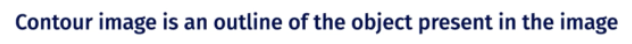

### Functions Used in detecting contours -

- **cv2.cvtColor** (change to greyscale image)
- **cv2.threshold**  (change to binary image - black and white, to seperate background from foreground)
- **cv2.findContours**
- **cv2.drawContours**

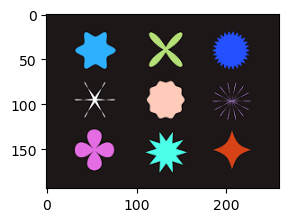

In [51]:
img_s = cv2.imread('/Users/sylvia/Desktop/datasets/CV/shape.png')
plt.figure(figsize=(3,3))
plt.imshow(img_s);

**<font color=blue>cv2.cvtColor** 

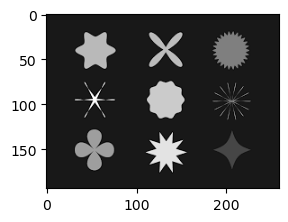

In [52]:
# Convert image to greyscale

grey_img_s = cv2.cvtColor(img_s, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(grey_img_s, cmap='gray');

**<font color=blue>cv2.threshold**

Note - If here threshold taken as 50 all boundaries could be detected, if taken as 127 one figure out of 9 got black and hence could not be detected (both cases shown below). So need to find a way to decide on threshold as every image will have different intensities of color & based on threshold it will be changed to either 0 or 255.

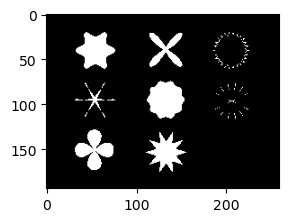

In [53]:
#thres_val, thres_img = cv2.threshold(grey_img_s,127,255,cv2.THRESH_BINARY)
thres_val, thres_img = cv2.threshold(grey_img_s,127,255,0)
plt.figure(figsize=(3,3))

plt.imshow(thres_img, cmap='gray');    # Thresholding

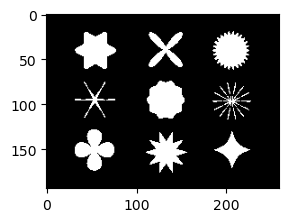

In [54]:
#thres_val, thres_img = cv2.threshold(grey_img_s,127,255,cv2.THRESH_BINARY)
thres_val1, thres_img1 = cv2.threshold(grey_img_s,50,255,0)
plt.figure(figsize=(3,3))

plt.imshow(thres_img1, cmap='gray');    # Thresholding

**<font color=blue>cv2.findContours**

See, there are three arguments in cv.findContours() function, 

- first one is source image, 
- second is contour retrieval mode, 
- third is contour approximation method. 
- And it outputs the contours and hierarchy. 
- Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

In [55]:
contours, hierarchy = cv2.findContours(thres_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours
#hierarchy

contours1, hierarchy1 = cv2.findContours(thres_img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [56]:
hierarchy.shape

(1, 76, 4)

**<font color=blue>cv2.drawContours**

- To draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. 
- Its first argument is source image, 
- second argument is the contours which should be passed as a Python list,
- third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) 
- remaining arguments are color, thickness etc.



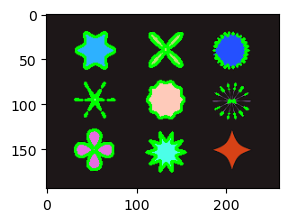

In [57]:
with_contours = cv2.drawContours(img_s, contours, -1, (0,255,0),2)
plt.figure(figsize=(3,3))
plt.imshow(with_contours);

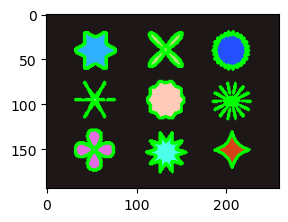

In [58]:
with_contours1 = cv2.drawContours(img_s, contours1, -1, (0,255,0),2)
plt.figure(figsize=(3,3))
plt.imshow(with_contours1);

# 0,255,0 means green color outline with thickness of 3

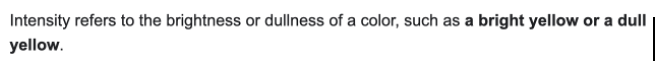

# References

1. HSV color code - https://www.lifewire.com/what-is-hsv-in-design-1078068


2. Affine Transformation - https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html


3. Edge Detection - https://en.wikipedia.org/wiki/Edge_detection


4. Edge detection methods/algorithms - https://anirban-karchaudhuri.medium.com/edge-detection-methods-comparison-9e4b75a9bf87


5. Interpolation algorithm - https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html


6. Image Thresholding documentation - https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


7. Image Thresholding concept - https://stackabuse.com/opencv-thresholding-in-python-with-cv2threshold/


8. Contours in Images - https://medium.com/swlh/contours-in-images-a58b4c12c0ff


9. Contours documentation - https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html